In [1]:
from encoders import *
from model_grssl import *

%load_ext autoreload
%autoreload 2

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
t = GRSSLModel(#encoder_name="gin"
               #, output_dimension=32
              )

In [3]:
encoder_test = Encoder(GATConv,
                       num_layers = 2,
                       input_dimension = 16,
                       output_dimension=4,
                       hidden_dimension=8,
                       **{
                           "num_heads":4,
                           "feat_drop":0.3
                       }
                      )

In [4]:
encoder_test

Encoder(
  (layers): ModuleList(
    (0): GATConv(
      (fc): Linear(in_features=16, out_features=32, bias=False)
      (feat_drop): Dropout(p=0.3, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): Identity()
    )
    (1): GATConv(
      (fc): Linear(in_features=8, out_features=16, bias=False)
      (feat_drop): Dropout(p=0.3, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): Identity()
    )
  )
)

In [5]:
encoder_test2 = GAT(
                       num_layers = 2,
                       input_dimension = 4,
                       output_dimension=4,
                       num_heads=8,
                       v2=True,
                       **{
                           "feat_drop":0.3,
                       }
                      )
encoder_test2

GAT(
  (layers): ModuleList(
    (0): GATv2Conv(
      (fc_src): Linear(in_features=4, out_features=256, bias=True)
      (fc_dst): Linear(in_features=4, out_features=256, bias=True)
      (feat_drop): Dropout(p=0.3, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (1): GATv2Conv(
      (fc_src): Linear(in_features=32, out_features=32, bias=True)
      (fc_dst): Linear(in_features=32, out_features=32, bias=True)
      (feat_drop): Dropout(p=0.3, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): Identity()
    )
  )
)

In [6]:
appended_encoders = encoder_test + encoder_test2
appended_encoders

Encoder(
  (layers): ModuleList(
    (0): GATConv(
      (fc): Linear(in_features=16, out_features=32, bias=False)
      (feat_drop): Dropout(p=0.3, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): Identity()
    )
    (1): GATConv(
      (fc): Linear(in_features=8, out_features=16, bias=False)
      (feat_drop): Dropout(p=0.3, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): Identity()
    )
    (2): GATv2Conv(
      (fc_src): Linear(in_features=4, out_features=256, bias=True)
      (fc_dst): Linear(in_features=4, out_features=256, bias=True)
      (feat_drop): Dropout(p=0.3, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (3): GATv2Conv(
      (fc_src): Linear(in_features=32, out_features=32,

In [7]:
appended_encoders.num_layers

4

In [8]:
encoder_test2 = GCN(
                       num_layers = 4,
                       input_dimension = 16,
                       output_dimension=2,
                       hidden_dimension=32,
    readout_args={"n_iters":6, "n_layers":3},
    readout="set2set",
                       **{
                           "allow_zero_in_degree":False,
                           "norm":'both',
                           "weight":False,
                       }
                      )
encoder_test2

GCN(
  (layers): ModuleList(
    (0): GraphConv(
      in=16, out=32, normalization=both
      (_activation): ReLU()
    )
    (1): GraphConv(
      in=32, out=32, normalization=both
      (_activation): ReLU()
    )
    (2): GraphConv(
      in=32, out=32, normalization=both
      (_activation): ReLU()
    )
    (3): GraphConv(
      in=32, out=2, normalization=both
      (_activation): Identity()
    )
  )
  (linear): Linear(in_features=64, out_features=32, bias=True)
  (readout): Set2Set(
    n_iters=6
    (lstm): LSTM(64, 32, num_layers=3)
  )
)

In [9]:
encoder_test2.readout

Set2Set(
  n_iters=6
  (lstm): LSTM(64, 32, num_layers=3)
)

In [10]:
from torch import Tensor

In [11]:
t = Tensor(2)
t[0] = 1
t[1] = 2
t

tensor([1., 2.])

In [12]:
encoder_mlp = MLP(
    num_layers=4,
    input_dimension=2,
    output_dimension=2,
    hidden_dimension=2,
    activation='relu'
)

encoder_mlp

MLP(
  (layers): ModuleList(
    (0): PLayer(
      in_features=2, out_features=2, bias=True
      (act): ReLU()
      (norm): Identity()
    )
    (1): PLayer(
      in_features=2, out_features=2, bias=True
      (act): ReLU()
      (norm): Identity()
    )
    (2): PLayer(
      in_features=2, out_features=2, bias=True
      (act): ReLU()
      (norm): Identity()
    )
    (3): PLayer(
      in_features=2, out_features=2, bias=True
      (act): Identity()
      (norm): Identity()
    )
  )
)

In [13]:
encoder_mlp.layers[0].forward(t)

tensor([0.8570, 0.0660], grad_fn=<AddBackward0>)

In [14]:
encoder_mlp.forward(t)

tensor([-0.2498,  0.1992], grad_fn=<AddBackward0>)

# 🐭 Test experiments

In [15]:
import dgl
import networkx as nx

from encoders import *
from model_grssl import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


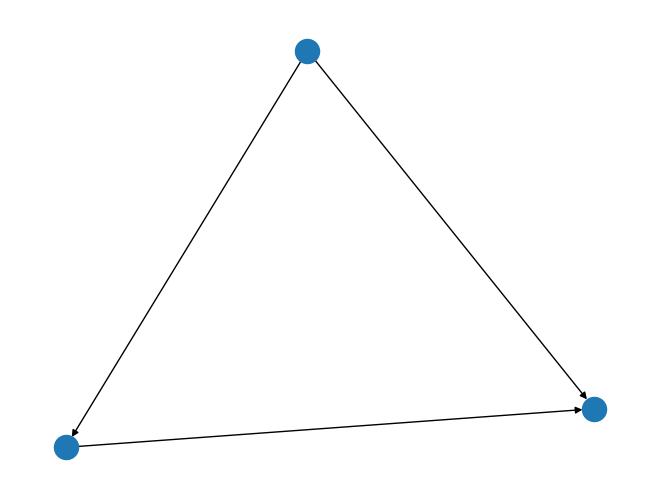

In [16]:
g = dgl.DGLGraph()
g.add_nodes(3)
g.add_edges([0, 0, 1], [1, 2, 2])
feat = torch.rand(3, 128)

nx.draw(dgl.to_networkx(g))

## GAT

In [17]:
hidden_dimension = int(16*4)
hidden_dimension % 4

0

In [18]:
# /!\ v2 does not work
model = GAT(
    input_dimension=128,
    output_dimension=16,
    num_layers =4,
    #hidden_dimension=64,
    
    num_heads=8,
    activation='relu',
    #v2=True,
    
    allow_zero_in_degree = True
)

print(model)


print("..... forwarding\n => output of size:", model(g, feat).shape)

GAT(
  (layers): ModuleList(
    (0): GATConv(
      (fc): Linear(in_features=128, out_features=1024, bias=False)
      (feat_drop): Dropout(p=0.0, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (1): GATConv(
      (fc): Linear(in_features=128, out_features=1024, bias=False)
      (feat_drop): Dropout(p=0.0, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (2): GATConv(
      (fc): Linear(in_features=128, out_features=1024, bias=False)
      (feat_drop): Dropout(p=0.0, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (3): GATConv(
      (fc): Linear(in_features=128, out_features=128, bias=False)
      (feat_drop)

## GCN

In [21]:
model = GCN(
    input_dimension=128,
    output_dimension=16,
    num_layers =4,
    hidden_dimension=64,
    readout="avg",
    layernorm = False,
    #set2set_lstm_layer = 3,
    #set2set_iter = 6,
    activation = 'relu',
    allow_zero_in_degree = True
)

print(model)
g = dgl.DGLGraph()
g.add_nodes(3)
g.add_edges([0, 0, 1], [1, 2, 2])
feat = torch.rand(3, 128)

print("..... forwarding\n => output of size:", model(g, feat).shape)

GCN(
  (layers): ModuleList(
    (0): GraphConv(
      in=128, out=64, normalization=both
      (_activation): ReLU()
    )
    (1): GraphConv(
      in=64, out=64, normalization=both
      (_activation): ReLU()
    )
    (2): GraphConv(
      in=64, out=64, normalization=both
      (_activation): ReLU()
    )
    (3): GraphConv(
      in=64, out=16, normalization=both
      (_activation): Identity()
    )
  )
  (readout): AvgPooling()
)
..... forwarding
 => output of size: torch.Size([1, 16])


## GIN

In [27]:
model = GIN(
    input_dimension=128,
    output_dimension=16,
    num_layers =4,
    hidden_dimension=64,
        
    activation='relu',
    norm="use_selayer",
    num_mlp_layers= 2,
    #allow_zero_in_degree = True
)

print(model)


print("..... forwarding.... \n => output of size:")
print(model(g, feat).shape)

GIN(
  (layers): ModuleList(
    (0): GINLayer(
      (activation): ReLU()
      (mlp): MLP(
        (layers): ModuleList(
          (0): PLayer(
            in_features=128, out_features=64, bias=True
            (act): ReLU()
            (norm): Identity()
          )
          (1): PLayer(
            in_features=64, out_features=64, bias=True
            (act): Identity()
            (norm): Identity()
          )
        )
      )
      (apply_func): ApplyNodeFunc(
        (mlp): MLP(
          (layers): ModuleList(
            (0): PLayer(
              in_features=128, out_features=64, bias=True
              (act): ReLU()
              (norm): Identity()
            )
            (1): PLayer(
              in_features=64, out_features=64, bias=True
              (act): Identity()
              (norm): Identity()
            )
          )
        )
        (norm): SELayer(
          (encoder_decoder): Sequential(
            (0): Linear(in_features=64, out_features=8, bias=True)

## Graph Self Supervised Representation Learning

In [37]:
gin_args = {
    'num_layers':4,
    'input_dimension':128,
    'output_dimension':16,
    'hidden_dimension':64
}

In [46]:
gcc_model = GCCModel()

{'num_layers': 4, 'input_dimension': 128, 'output_dimension': 16, 'hidden_dimension': 64}


In [47]:
gcc_model(g)

KeyError: 'seed'